# AI Community @ Семинар № 7
## Операция свертки $*$

### Краткая теория

Операция свертки матрицы $x$ с ядром (фильтром) $w$:  
$$(x * w)[i, j] = \sum_{a = -A}^{A} \sum_{b = -B}^{B} \space w[a, b] \cdot x[i + a, j + b]$$  
![](images/convolution.png)
Фильтр $w$ имеет размер $(2A + 1)\times(2B + 1)$.  
Свертку можно использовать для применения фильтров к изображениям.

### Padding

![](images/padding.png)

### Stride

![](images/stride_examples.png)

### Примеры

In [4]:
import skimage
import numpy as np

from scipy.signal import convolve2d
from skimage.io import imread
from skimage.measure import block_reduce
from matplotlib import pyplot as plt
from utils import gaussian

%matplotlib inline

In [5]:
X = imread("./images/mysia.jpg")

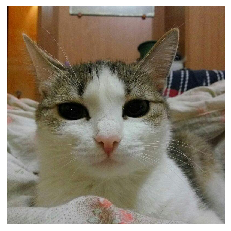

In [6]:
plt.imshow(X);
plt.axis('off');

#### Размытие

Чтобы создать эффект размытия изображения, свернем изображение с фильтром Гаусса.  
Используем функцию, которую мы использовали в Семинаре 2 для создания виньетки:

In [7]:
size = 50
gaussian_filter = gaussian((size, size), int(size / 2), int(size / 2), 20, 20)

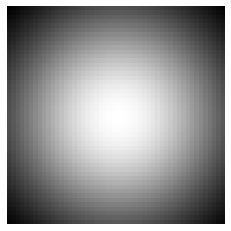

In [8]:
plt.imshow(gaussian_filter, cmap='gray');
plt.axis('off');

Теперь сделаем свертку.  
Используем метод `convolve2d` из `scipy.signal`:

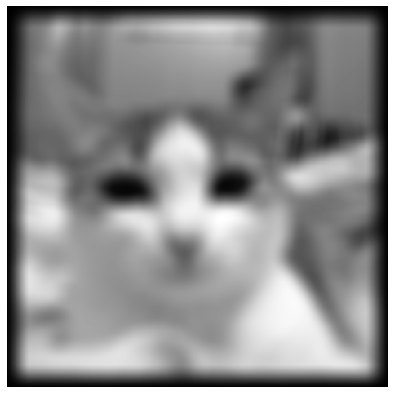

In [9]:
plt.figure(figsize=(7, 7))
plt.imshow(convolve2d(skimage.color.rgb2gray(X), gaussian_filter), cmap='gray');
plt.axis('off');

---
#### Нахождение границ на изображении

Для нахождения границ, свернем изображение $A$ с операторами Собеля $sobel_x$ и $sobel_y$ для получения градиентов на изображении в горизонтальном и вертикальном направлении.  

$$
sobel_x = \begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix}, sobel_y = \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{pmatrix}, 
$$
$$G_x = sobel_x * A$$ 
$$G_y = sobel_y * A$$
$$edges = \sqrt{G_x^2 + G_y^2}$$

Направление градиента: $\Theta = \mathrm{arctan}\space \frac{G_y}{G_x}$

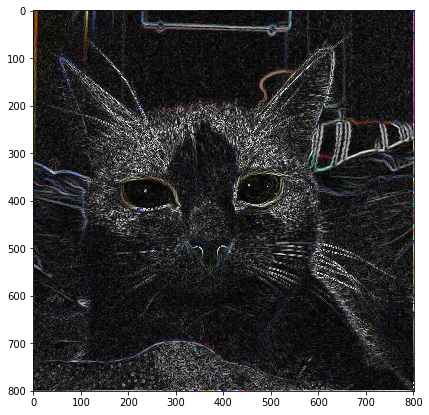

In [10]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [1,  2,  1],
    [0,  0,  0],
    [-1, -2, -1]
])

channels = []
for d in range(3):
    sx, sy = convolve2d(X[:, :, d], sobel_x), convolve2d(X[:, :, d], sobel_y)
    channels.append(np.sqrt(sx * sx + sy * sy)) # edges
#     channels.append(np.arctan2(sy, sx)) # gradient direction

im_conv = np.stack(channels, axis=2).astype("uint8")
plt.figure(figsize=(7, 7))
plt.imshow(im_conv);

---
#### Градиент по одному направлению

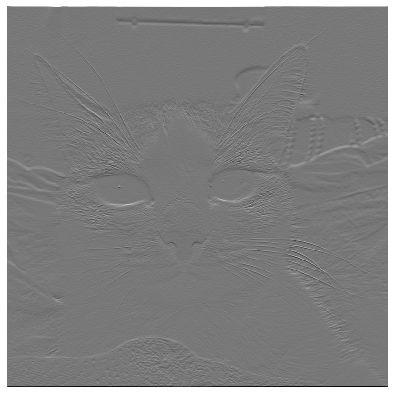

In [12]:
plt.figure(figsize=(7, 7))
plt.imshow(convolve2d(skimage.color.rgb2gray(X), sobel_y), cmap='gray');
plt.axis('off');

---
#### Случайный фильтр

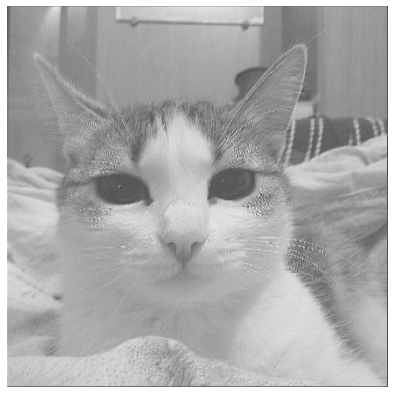

In [13]:
random_filter = np.random.randint(-5, 6, (4, 4))
random_filtered_image = convolve2d(skimage.color.rgb2gray(X), random_filter)
plt.figure(figsize=(7, 7))
plt.imshow(random_filtered_image, cmap='gray');
plt.axis('off');

### Интерактивная свёртка

[Image Kernels Explained Visually](http://setosa.io/ev/image-kernels/)

## Pooling

### Краткая теория

Pooling - операция, агрегирующая данные прямоугольной области размера $h \times h$ с помощью функции $F$.  
$$pool(i, j) = F(x[i, j], ..., x[i + h - 1, j + h - 1]).$$
$F$ - агрегирующая функция, может быть $\mathrm{max}$, $\mathrm{min}$, ...  
![](images/pooling.png)

### Примеры

In [14]:
def show_pooling(aggregate_function, block_size=15):
    channels = []
    for d in range(3):
        channels.append(block_reduce(X[:, :, d], (block_size, block_size), aggregate_function))
    image_pooled = np.stack(channels, axis=2).astype('uint8')
    plt.figure(figsize=(7, 7))
    plt.imshow(image_pooled)
    plt.axis('off')
    plt.show()

#### Max-pooling

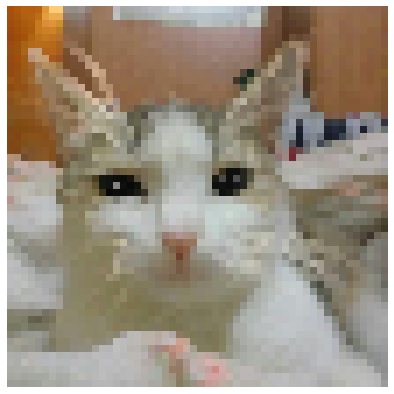

In [15]:
show_pooling(np.max)

#### Average-pooling

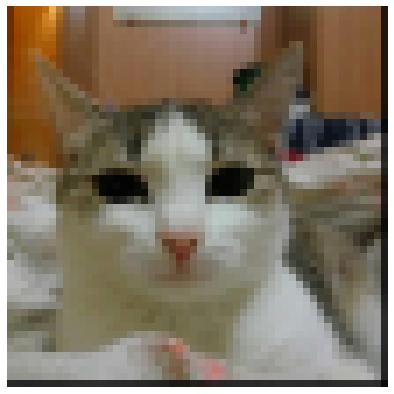

In [16]:
show_pooling(np.mean)

#### Min-pooling

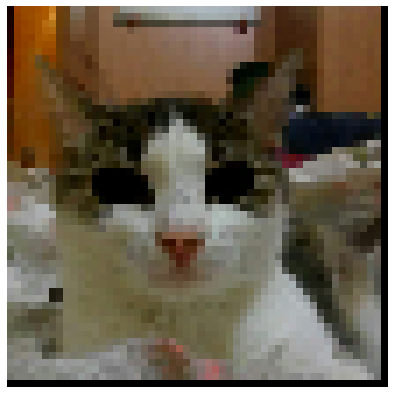

In [17]:
show_pooling(np.min)

#### Variance-pooling

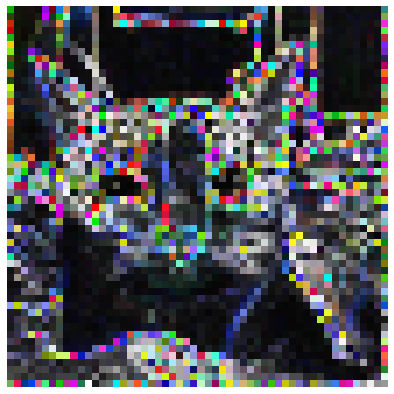

In [18]:
show_pooling(np.var)

Источники и ссылки:  
1. [Conway's Game of Life using Convolutions](http://nbviewer.jupyter.org/gist/jiffyclub/3778422)
2. [CS231n: Convolutional Neural Networks](http://cs231n.github.io/convolutional-networks/)